# Predicting Adult's Income
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The dataset is collected from <a href = "https://www.kaggle.com/uciml/adult-census-income">kaggle</a>.

### Steps:
1. Loading the libraries and dataset
2. Data Preprocessing
3. Data Analysis (EDA)
4. Machine Learning
5. Performance Evaluation


## 1. Import the imporatant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [227]:
#read data from drive folder
data = pd.read_csv("/Users/adityaagarwal/Aditya Ag/Jupyter Notebook/Data Science Projects/Adult's Income Prediction/dataset/Adult income.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 2. Data Preprocessing

### Renaming Columns

In [228]:
data = data.rename(columns ={'education.num':"education number", "marital.status":"marital status", "capital.gain": "capital gain",
                    "capital.loss":"capital loss", "hours.per.week":"hours per week", "native.country":"native country"})

In [229]:
# Checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education number  32561 non-null  int64 
 5   marital status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital gain      32561 non-null  int64 
 11  capital loss      32561 non-null  int64 
 12  hours per week    32561 non-null  int64 
 13  native country    32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [230]:
# Data columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education number',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'capital gain', 'capital loss', 'hours per week', 'native country',
       'income'],
      dtype='object')

In [231]:
# Checking for null values
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education number    0
marital status      0
occupation          0
relationship        0
race                0
sex                 0
capital gain        0
capital loss        0
hours per week      0
native country      0
income              0
dtype: int64

#### Dealing with `WorkClass` and `occupation` variables

In [232]:
# Checking for `?` in workclass and occupation and check if there is any relationship or not
data[(data['workclass']=='?') & (data['occupation']=='?')]

,age,workclass,fnlwgt,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


We could see that `?` is present in both `workclass` and `occupation` columns all together. So it is ideal to remove all the rows with '?'.

In [233]:
# Checking for unquie values
print(data.workclass.unique(),"\n")

print(data.occupation.unique())

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


#### Method 1: Replacing "?" with `Null` values and then replacing with `forward values`

In [234]:
# Replacing `?` with null values
data = data.replace('?', np.nan)

In [235]:
# Crosschecking the null values
data.isnull().sum()

age                    0
workclass           1836
fnlwgt                 0
education              0
education number       0
marital status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital gain           0
capital loss           0
hours per week         0
native country       583
income                 0
dtype: int64

In [236]:
data.fillna(method='ffill', inplace = True, axis = 0)

#### Dropping 1st index

In [239]:
data.drop(0, inplace = True)

KeyError: '[0] not found in axis'

#### Method 2: Drop None records and Redunadant column

In [34]:
for col in data.columns:
  indexNames = data[ data[col] == "?" ].index
# Delete these row indexes from dataFrame
  data.drop(indexNames , inplace=True)
(data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Checking the data type

In [245]:
data.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education number     int64
marital status      object
occupation          object
relationship        object
race                object
sex                 object
capital gain         int64
capital loss         int64
hours per week       int64
native country      object
income              object
dtype: object

#### Description of numerical column data




In [243]:
data.describe()

,age,fnlwgt,education number,capital gain,capital loss,hours per week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.580068,1.897818e+05,10.080713,1077.681941,87.172727,40.437469
std,13.637665,1.055497e+05,2.572753,7385.403083,402.271369,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 3. Data Analysis

#### Education categories

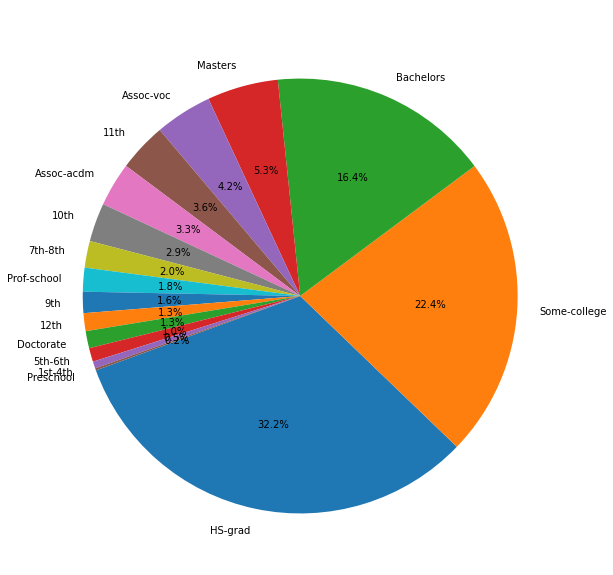

In [251]:
plt.figure(figsize=(10,10))
temp_series = data['education'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Education", fontsize=15, color="w")
plt.savefig('Images/Pie-chart')
plt.show()

#### Workclass categories


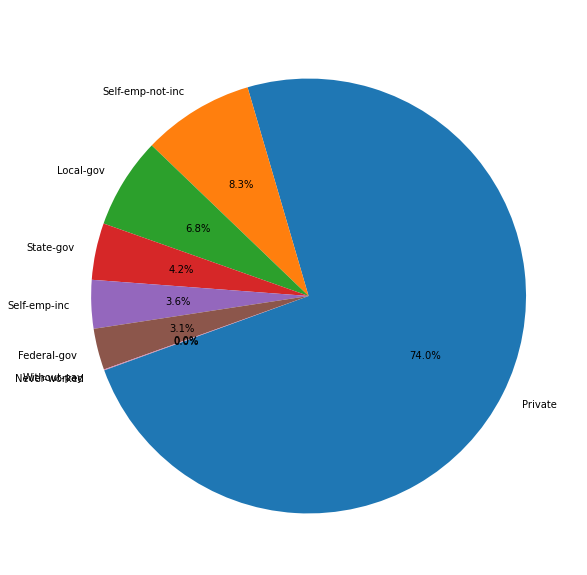

In [254]:
plt.figure(figsize=(10,10))
temp_series = data['workclass'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Workclass", fontsize=15,color="w")
plt.savefig('Images/Work-Class - Pie-chart')
plt.show()

#### Marital Status Categories




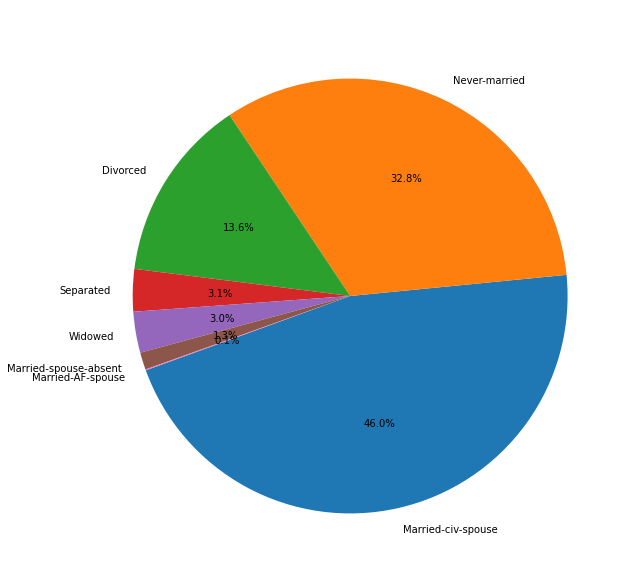

In [256]:
plt.figure(figsize=(10,10))
temp_series = data['marital status'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Marital Status", fontsize=15,color="w")
plt.savefig('Images/Martial status - Pie-chart')
plt.show()

Histogram of every numerical column

---



array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education number'}>,
        <AxesSubplot:title={'center':'capital gain'}>],
       [<AxesSubplot:title={'center':'capital loss'}>,
        <AxesSubplot:title={'center':'hours per week'}>]], dtype=object)

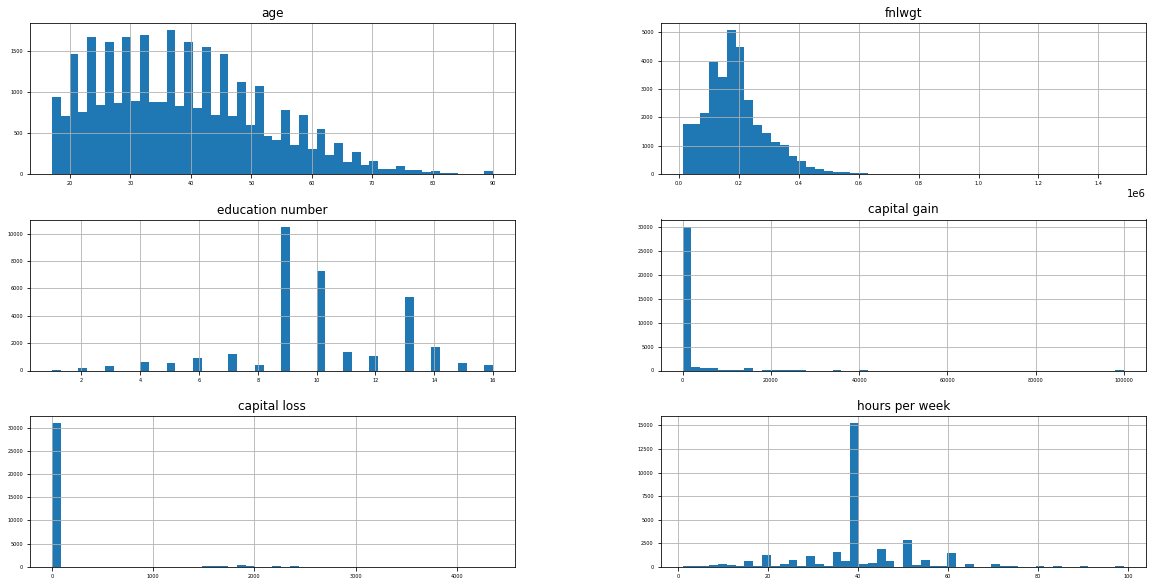

In [258]:
data.hist(figsize=(20,10), bins=50, xlabelsize=5, ylabelsize=5)

#### Distribution of Education Income wise




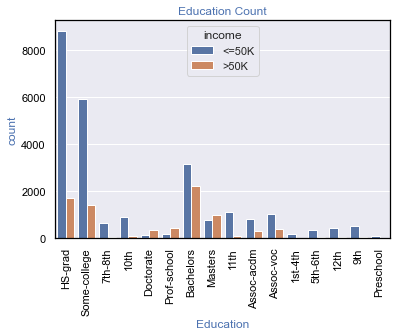

<Figure size 432x288 with 0 Axes>

In [266]:
import seaborn as sns   
sns.set(color_codes=True)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
  scatplot = sns.countplot(x="education",hue="income", data=data)

  plt.xlabel('Education',color="b")
  plt.ylabel('count',color="b")
  plt.xticks(rotation=90)
  plt.title('Education Count',color="b")
  plt.show()

plt.savefig('Images/edu_vs_income')

#### Distribution of Income "hours-per-week" wise



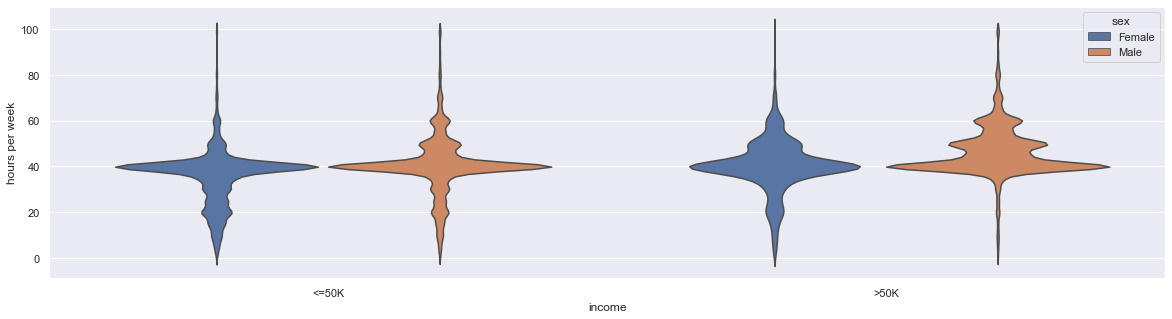

In [277]:
fig, ax =plt.subplots(1,1,figsize=(20,5))
ax = sns.violinplot(x="income", y="hours per week",hue="sex", data=data, inner=None)

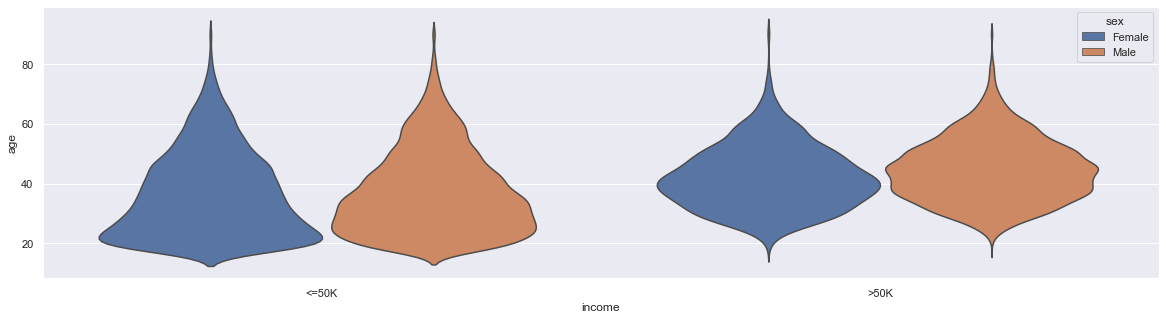

In [274]:
fig, ax =plt.subplots(1,1,figsize=(20,5))
ax = sns.violinplot(x="income", y="age",hue="sex", data=data, inner=None)

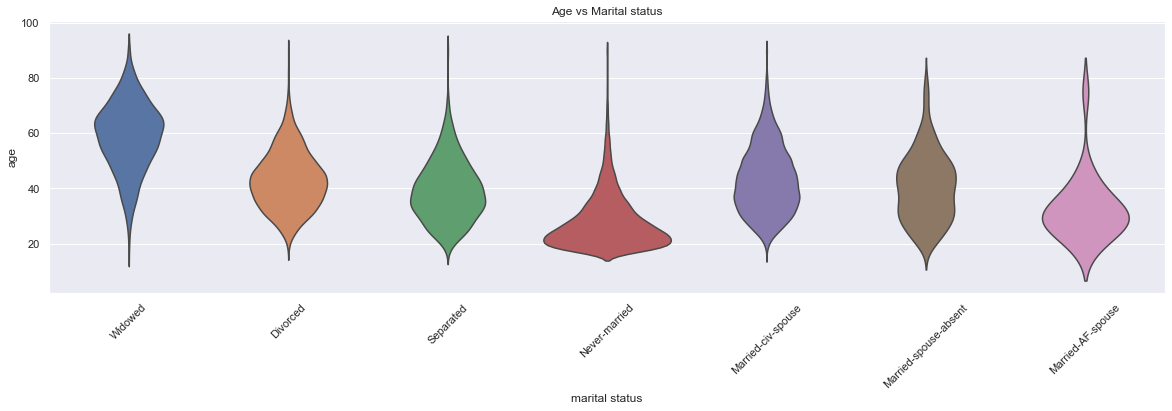

In [270]:
fig, ax =plt.subplots(1,1,figsize=(20,5))
ax.set_xticklabels(labels, rotation=45)
ax.set_title("Age vs Marital status")
ax = sns.violinplot(x="marital status", y="age", data=data, inner=None)

**Normalization**

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','capital-gain','capital-loss','hours-per-week']

for i in numerical:
  data[i]-=data[i].min()
  data[i] /= data[i].max()


In [ ]:
data.head() 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


Convert the categorical columns in numeric type

---



In [ ]:
numerical.append("fnlwgt")
features_final = pd.get_dummies(data)
for col in data.columns:
  if col not in numerical:
    temp={}
    for i in range(len(data[col].unique())):
      temp[data[col].unique()[i]]=i
    work = data[col].map(temp)
    data[col]=work

encoded = list(data.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
encoded

14 total features after one-hot encoding


['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [ ]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0,226802,0,0,0,0,0,0,0.000000,0.0,0.397959,0,0
1,0.287671,0,89814,1,1,1,1,1,0,0.000000,0.0,0.500000,0,0
2,0.150685,1,336951,2,1,2,1,1,0,0.000000,0.0,0.397959,0,1
3,0.369863,0,160323,3,1,0,1,0,0,0.076881,0.0,0.397959,0,1
5,0.232877,0,198693,4,0,3,2,1,0,0.000000,0.0,0.295918,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,257302,2,1,8,4,1,1,0.000000,0.0,0.377551,0,0
48838,0.315068,0,154374,1,1,0,1,1,0,0.000000,0.0,0.397959,0,1
48839,0.561644,0,151910,1,2,6,3,1,1,0.000000,0.0,0.397959,0,0
48840,0.068493,0,201490,1,0,6,0,1,0,0.000000,0.0,0.193878,0,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Find Correlation of all the columns with target column

---



In [ ]:
col_names = data.columns
param = []
correlation = []
abs_corr = []
for c in col_names:
  if c != "income":
    if len(data[c].unique()) <= 2:
      corr = spearmanr(data['income'],data[c])[0]
    else:
      corr = pointbiserialr(data['income'],(data[c]))[0]
    param.append(c)
    correlation.append(corr)
    abs_corr.append(abs(corr))

param_df = pd.DataFrame({'correlation':correlation, 'parameter':param, 'abs_corr':abs_corr})
param_df = param_df.sort_values(by=['abs_corr'], ascending = False)
param_df = param_df.set_index('parameter')
param_df

,correlation,abs_corr
parameter,,
age,0.237040,0.237040
hours-per-week,0.227199,0.227199
capital-gain,0.221034,0.221034
gender,-0.215760,0.215760
education,0.179285,0.179285
capital-loss,0.148687,0.148687
workclass,0.137756,0.137756
relationship,-0.067427,0.067427
occupation,0.042601,0.042601


In [ ]:
income = data['income']
TP = np.sum(income)
FP = income.count()-TP
TN = 0
FN = 0
accuracy = TP/(TP + FP +TN + FN)
recall = TP / (TP+FN)
precision = TP / (TP+FP)
beta = 0.5
fscore = (1+beta**2)*((precision*recall)/ ((beta**2)*precision + recall))
print(accuracy)
print(fscore)

0.2478439697492371
0.29172913543228385


In [ ]:
best_features = param_df.index[0:11].values
print(best_features)

['age' 'hours-per-week' 'capital-gain' 'gender' 'education' 'capital-loss'
 'workclass' 'relationship' 'occupation' 'race' 'marital-status']


In [ ]:
features_final=data

Drop unrelavent columns

---



In [ ]:

for col in data.columns:
  if(col not in best_features):
    features_final=features_final.drop(col,axis=1)

features_final

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,0.109589,0,0,0,0,0,0,0,0.000000,0.0,0.397959
1,0.287671,0,1,1,1,1,1,0,0.000000,0.0,0.500000
2,0.150685,1,2,1,2,1,1,0,0.000000,0.0,0.397959
3,0.369863,0,3,1,0,1,0,0,0.076881,0.0,0.397959
5,0.232877,0,4,0,3,2,1,0,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,2,1,8,4,1,1,0.000000,0.0,0.377551
48838,0.315068,0,1,1,0,1,1,0,0.000000,0.0,0.397959
48839,0.561644,0,1,2,6,3,1,1,0.000000,0.0,0.397959
48840,0.068493,0,1,0,6,0,1,0,0.000000,0.0,0.193878


In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(features_final, income, test_size=0.30, random_state=1)
X_train, Y_train = SMOTE().fit_sample(x_train, y_train)

SVM

---



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)

y_pred = clf.predict(x_test)

y_train_score = clf.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_train_score, normalize=False, sample_weight=None)*100/len(Y_train))

77.63691309795828
82.77642515321972


Confusion matrix
[[7629 2563]
 [ 471 2904]]


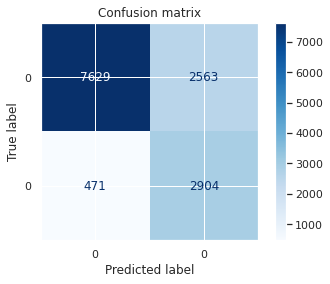

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Logistic Regression

---



In [ ]:
logregmodel = LogisticRegression()
logregmodel.fit(X_train, Y_train)
y_pred = logregmodel.predict(x_test)
y_test_pred = logregmodel.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))

72.8311343701629
73.33347326001176


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix
[[7416 2776]
 [ 910 2465]]


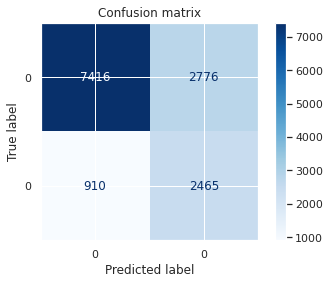

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logregmodel, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Naive Bayes

---



In [ ]:

nb=GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(x_test)
y_test_pred = nb.predict(X_train)
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))

79.08896587307437
65.92015783729326


Confusion matrix
[[9415  777]
 [2060 1315]]


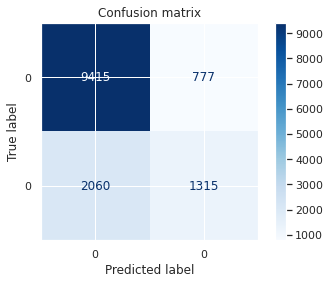

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Desicion Tree

---



In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)
dt = dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(x_test)
y_train_score_dt = dt.predict(X_train)
print(accuracy_score(y_test, y_pred_dt, normalize=False, sample_weight=None)*100/len(y_test))
print(accuracy_score(Y_train, y_train_score_dt, normalize=False, sample_weight=None)*100/len(Y_train))

77.87277953858627
83.55721601880614


Confusion matrix
[[7651 2541]
 [ 461 2914]]


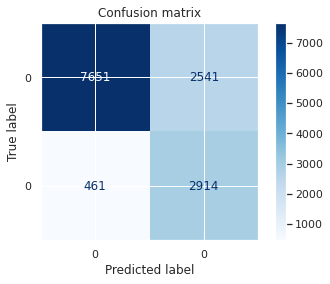

In [ ]:
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt, x_test, y_test,
                                 display_labels=income,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Random Forest

---



In [ ]:
rf=RandomForestClassifier(min_samples_split=20)
rf.fit(X_train, Y_train)
y_pred = rf.predict(x_test)
y_test_pred = rf.predict(X_train)
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
print(accuracy_score(Y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(Y_train))
print(len(X_train))
print(len(x_test))

83.1355494950984
91.81638821257661
47644
13567


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_pred, target_names = ['<50k','>=50k']))

              precision    recall  f1-score   support

        <50k       0.92      0.85      0.88     10192
       >=50k       0.64      0.77      0.70      3375

    accuracy                           0.83     13567
   macro avg       0.78      0.81      0.79     13567
weighted avg       0.85      0.83      0.84     13567



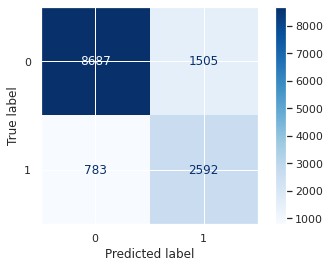

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rf, x_test, y_test,
                                 cmap=plt.cm.Blues)

plt.show()

In [ ]:
(rf.predict_proba(features_final))[:,1]
data["classification_score"]=(rf.predict_proba(features_final))[:,1]#>=50K

In [ ]:
data["predict_income"]=rf.predict(features_final)
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,classification_score,predict_income
0,0.109589,0,226802,0,0,0,0,0,0,0.000000,0.0,0.397959,0,0,0.000000,0
1,0.287671,0,89814,1,1,1,1,1,0,0.000000,0.0,0.500000,0,0,0.462652,0
2,0.150685,1,336951,2,1,2,1,1,0,0.000000,0.0,0.397959,0,1,0.514296,1
3,0.369863,0,160323,3,1,0,1,0,0,0.076881,0.0,0.397959,0,1,0.964127,1
5,0.232877,0,198693,4,0,3,2,1,0,0.000000,0.0,0.295918,0,0,0.011360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0,257302,2,1,8,4,1,1,0.000000,0.0,0.377551,0,0,0.466354,0
48838,0.315068,0,154374,1,1,0,1,1,0,0.000000,0.0,0.397959,0,1,0.398180,0
48839,0.561644,0,151910,1,2,6,3,1,1,0.000000,0.0,0.397959,0,0,0.032408,0
48840,0.068493,0,201490,1,0,6,0,1,0,0.000000,0.0,0.193878,0,0,0.000000,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


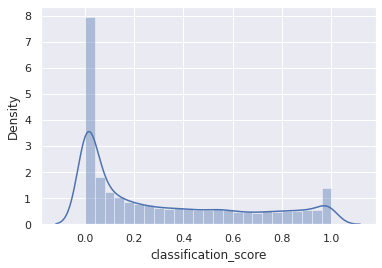

In [ ]:
sns.distplot(data["classification_score"],bins=25)

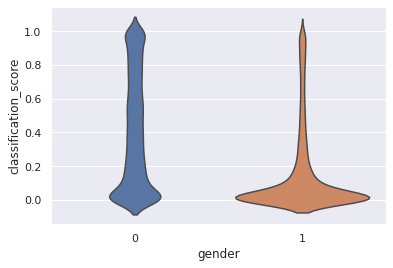

In [ ]:
ax = sns.violinplot(x="gender", y="classification_score", data=data, inner=None)# gender 0=Male 1=Female classification= prob(>=50K)

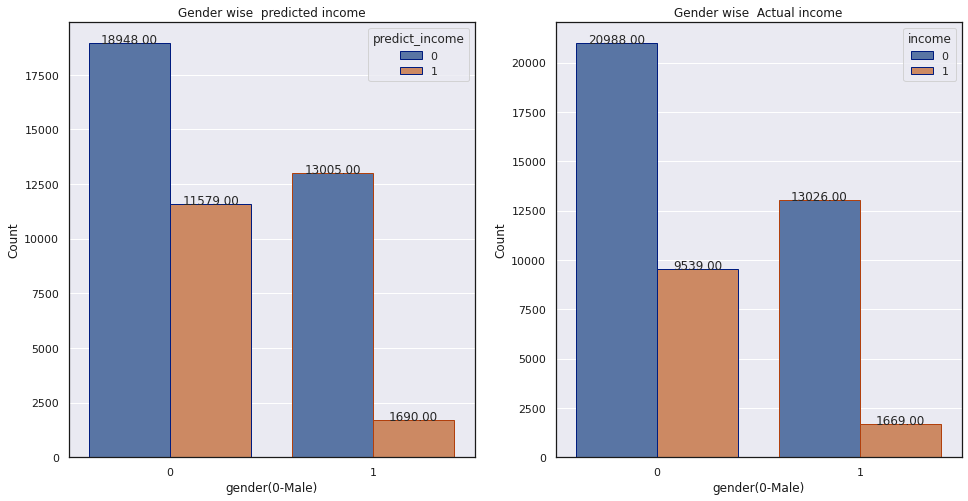

In [ ]:
with plt.rc_context({'axes.edgecolor':'k', 'xtick.color':'k', 'ytick.color':'k'}):
  fig, ax =plt.subplots(1,2,figsize=(16,8))

  scatplot1 = sns.countplot(x="gender",hue="predict_income", data=data, edgecolor=sns.color_palette("dark", 3),ax=ax[0])
  scatplot2 = sns.countplot(x="gender",hue="income", data=data,edgecolor=sns.color_palette("dark", 3), ax=ax[1])
  for p in scatplot1.patches:
    height = p.get_height()
    scatplot1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
  for p in scatplot2.patches:
    height = p.get_height()
    scatplot2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
    
  ax[0].set_title('Gender wise  predicted income',color="k")
  ax[0].set_xlabel('gender(0-Male)',color="k")
  ax[0].set_ylabel('Count',color="k")
  
  ax[1].set_title('Gender wise  Actual income',color="k")
  ax[1].set_xlabel('gender(0-Male)',color="k")
  ax[1].set_ylabel('Count',color="k")

  plt.show()